In [4]:
from networkx import Graph, draw_networkx
import networkx as nx
from scipy.io import mmread, mmwrite
import matplotlib.pyplot as plt
import os

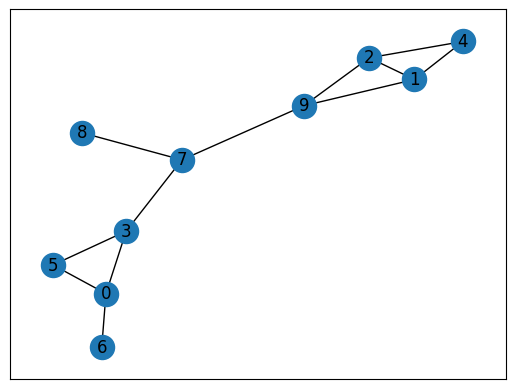

In [3]:
g = Graph(mmread('./test_matrix_fully_connected.mtx'))
draw_networkx(g, pos=nx.spring_layout(g))

In [66]:
mmread('./opsahl-ucsocial.mtx').todense()

matrix([[0, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
g = nx.fast_gnp_random_graph(1000, 0.1)
a = nx.to_scipy_sparse_array(g)
# mmwrite('test_matrix_1000.mtx', a)
# draw_networkx(g, pos=nx.spring_layout(g))

In [32]:
def normalize_graph_indices(filename):
    new_filename = filename.split('.')[0] + '_normalized.mtx'
    i = 1
    mappings = {}
    with open(filename, 'r') as old_file:
        with open(new_filename, 'w') as new_file:
            for line in old_file:
                from_node, to_node =  map(int, line.strip().split('\t'))
                if from_node not in mappings:
                    mappings[from_node] = i
                    i += 1
                if to_node not in mappings:
                    mappings[to_node] = i
                    i += 1
                new_file.write(f'{mappings[from_node]} {mappings[to_node]} 1\n')

def num_nodes_and_edges(filename):
    with open(filename, 'r') as file:
        nodes = set()
        edges = 0
        for line in file:
            from_node, to_node =  map(int, line.strip().split('\t'))
            nodes.add(from_node)
            nodes.add(to_node)
            edges += 1
        return len(nodes), edges

In [1]:
def out_to_mm(old_filename, new_filename):
    with open(old_filename, 'r') as old_file:
        with open(new_filename, 'w') as new_file:
            for line in old_file:
                from_node, to_node, *rest = line.strip().split()
                new_file.write(f'{from_node} {to_node} 1\n')

def remove_duplicate_edges(filename):
    line1, line2, *edges = open(filename, 'r').readlines()
    unique_edges = set(edges)
    max_node = list(map(int, line2.strip().split()))[0]
    line2 = f'{max_node} {max_node} {len(unique_edges)}\n'
    open(filename, 'w').writelines([line1, line2] + list(unique_edges))

In [10]:
# loop over directories in bfs_test dir
for dir in os.listdir('bfs_test'):
    if os.path.isdir(f'bfs_test/{dir}'):
        print(dir)
        out_to_mm(f'bfs_test/{dir}/out.{dir}', f'bfs_test/{dir}.mtx')
        # for file in os.listdir(f'bfs_test/{dir}'):
        #     print(file)
        #     if file.endswith('.mtx'):
        #         filename = f'bfs_test/{dir}/{file}'
        #         normalize_graph_indices(filename)
        #         remove_duplicate_edges(filename)
        #         print(num_nodes_and_edges(filename))

# out_to_mm('cfinder-google/out.cfinder-google', 'cfinder-google.mtx')

as20000102
chess
librec-ciaodvd-trust
maayan-vidal
moreno_blogs_blogs
moreno_innovation_innovation
wikilens-ratings


In [17]:
remove_duplicate_edges('bfs_test/wikilens-ratings.mtx')

In [8]:
def get_largest_cc(filename):
    g = Graph(mmread(filename))
    # Get only the nodes from the largest connected component and create a new graph with only these nodes
    g = g.subgraph(max(nx.connected_components(g), key=len))
    # Write this graph to a new file
    mmwrite(f'{filename.split(".")[0]}_largest_cc.mtx', nx.to_scipy_sparse_array(g))

for file in os.listdir('bfs_test'):
    if file.endswith('.mtx'):
        get_largest_cc(f'bfs_test/{file}')